In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/Users/harithakarimi/Desktop/Haritha/Machine learning/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
def ralph_size(x):
    i = x["Chest"]
    if i <= 86.4:
        return "XS"
    elif i > 86.4 and i <= 94:
        return "S"
    elif i > 94 and i <= 101.6:
        return "M"
    elif i > 101.6 and i <= 114.3:
        return "L"
    elif i > 114.3 and i <= 121.9:
        return "XL"
    else:
        return "XXL"
    
    
df["Size"] = df.apply(ralph_size, axis = 1)
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Size
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,S
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,S
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,M
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,L
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5,S
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,L
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0,L
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8,L


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [6]:
X = df.drop("Size", axis = 1)
y = df["Size"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((176, 15), (76, 15))

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [9]:
oob_score = classifier_rf.oob_score_
print("oob_score:", oob_score)

oob_score: 0.8977272727272727


In [10]:
classifier_rf.score(X_test, y_test)

0.9342105263157895

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(max_depth=5)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
pred=classifier_dt.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           L       1.00      0.96      0.98        27
           M       0.97      1.00      0.98        31
           S       1.00      1.00      1.00        14
          XL       1.00      1.00      1.00         3
         XXL       1.00      1.00      1.00         1

    accuracy                           0.99        76
   macro avg       0.99      0.99      0.99        76
weighted avg       0.99      0.99      0.99        76



In [71]:
CM=confusion_matrix(y_test,pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[26  1  0  0  0]
 [ 0 31  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  1]]


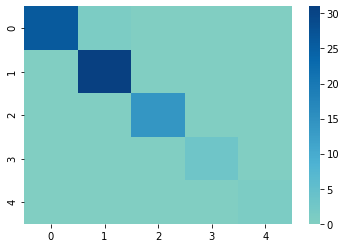

In [72]:
# drawing confusion matrix
sns.heatmap(CM, center = True,cmap='GnBu')
plt.show()

In [73]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(classifier_dt, X_train, y_train,
                target_name="target")

viz

ModuleNotFoundError: No module named 'dtreeviz'

In [67]:
classifier_dt.score(X_test, y_test)

0.9868421052631579

[Text(697.5, 951.3000000000001, 'X[6] <= 101.7\ngini = 0.724\nsamples = 176\nvalue = [61, 54, 41, 15, 4, 1]'),
 Text(418.5, 679.5, 'X[6] <= 94.1\ngini = 0.529\nsamples = 99\nvalue = [0, 54, 41, 0, 4, 0]'),
 Text(279.0, 407.70000000000005, 'X[6] <= 86.35\ngini = 0.162\nsamples = 45\nvalue = [0, 0, 41, 0, 4, 0]'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 4, 0]'),
 Text(418.5, 135.89999999999998, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41, 0, 0, 0]'),
 Text(558.0, 407.70000000000005, 'gini = 0.0\nsamples = 54\nvalue = [0, 54, 0, 0, 0, 0]'),
 Text(976.5, 679.5, 'X[6] <= 114.45\ngini = 0.334\nsamples = 77\nvalue = [61, 0, 0, 15, 0, 1]'),
 Text(837.0, 407.70000000000005, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0, 0, 0, 0]'),
 Text(1116.0, 407.70000000000005, 'X[3] <= 255.0\ngini = 0.117\nsamples = 16\nvalue = [0, 0, 0, 15, 0, 1]'),
 Text(976.5, 135.89999999999998, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 0, 15, 0, 0]'),
 Text(1255.5, 135.899999999

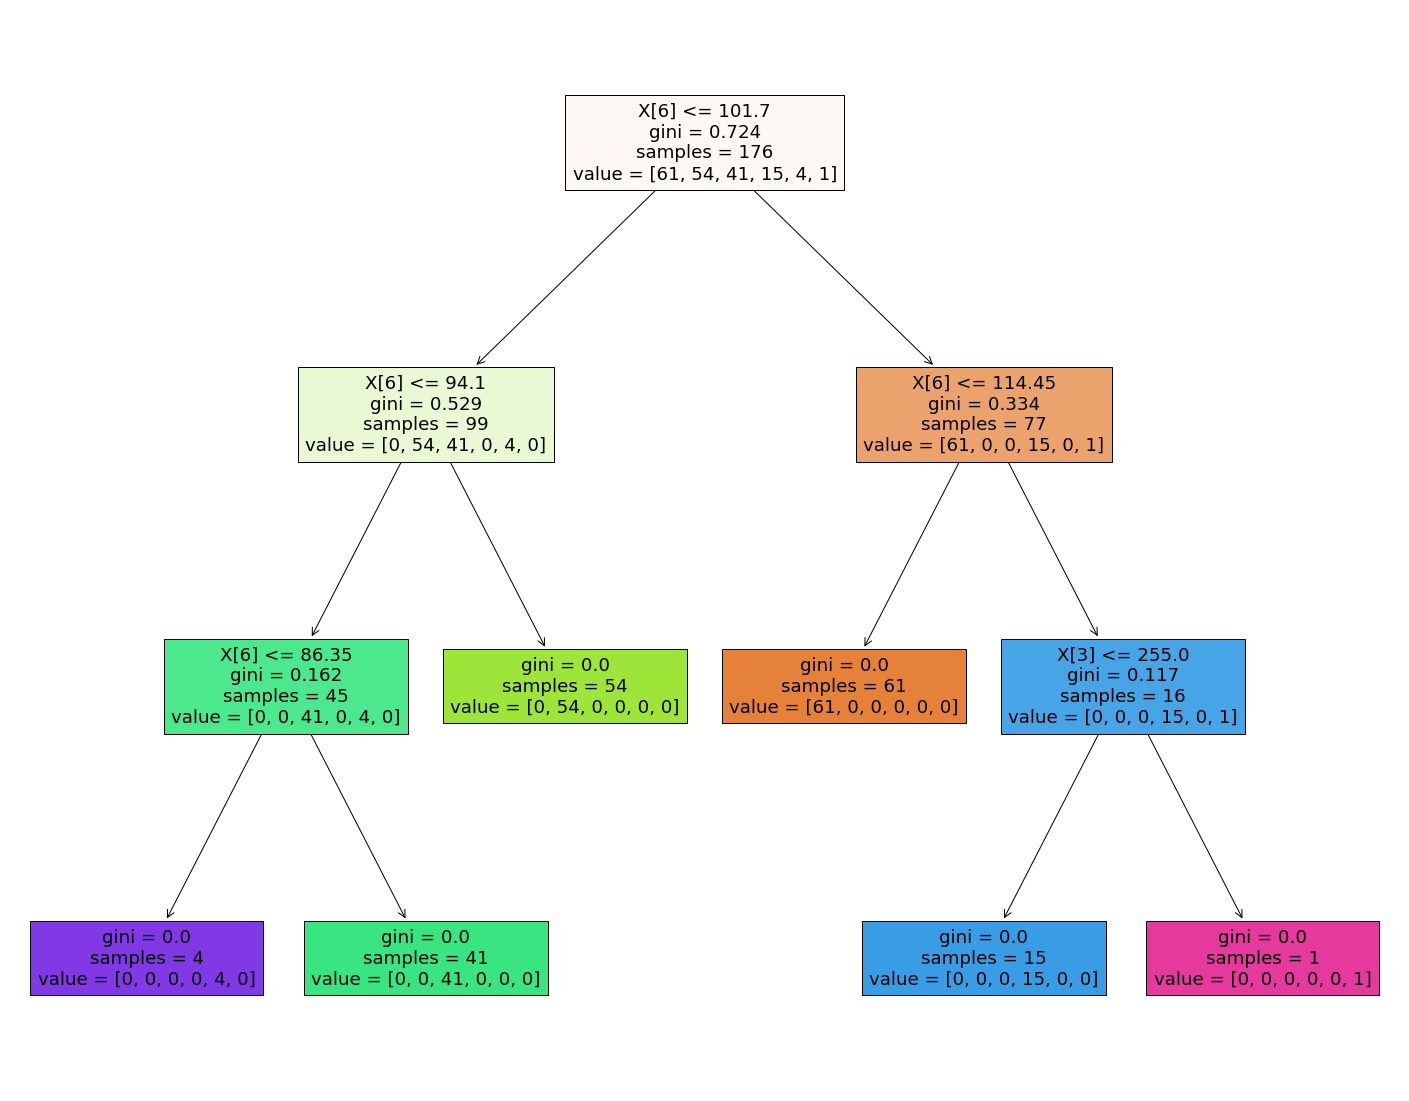

In [68]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(classifier_dt,filled=True)